Once deleted, variables cannot be recovered. Proceed (y/[n])? y


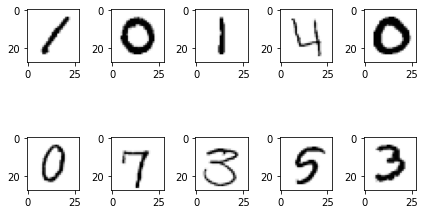

### Starting Training ###
Loss : 2.1720094680786133
Loss : 0.4856036901473999
Loss : 0.3368517756462097
Loss : 0.28529319167137146
Loss : 0.2572442889213562
Loss : 0.2382880598306656
Loss : 0.22412945330142975
Loss : 0.21287402510643005
Loss : 0.2036219835281372
Loss : 0.19591844081878662
### End Training ###
### Test Set으로 Accuracy 측정 ###
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1242
           1       0.95      0.97      0.96      1429
           2       0.91      0.88      0.90      1276
           3       0.90      0.90      0.90      1298
           4       0.91      0.91      0.91      1236
           5       0.87      0.86      0.87      1119
           6       0.93      0.95      0.94      1243
           7       0.94      0.91      0.93      1334
           8       0.87      0.87      0.87      1204
           9       0.87      0.88      0.88      1219

    accuracy                           0.91     12600
   macro

In [2]:
%reset

# Tensorflow 1.15버전
# multinomial classification으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')

##### 결측치와 이상치는 없음 #####

##### 이미지 확인 #####
img_data = df.drop('label', axis=1, inplace=False).values

fig = plt.figure()
fig_arr = []

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys')

plt.tight_layout()
plt.show()


# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]), name='weight')
b = tf.Variable(tf.random.normal([10]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 200
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t})

        if step % 20 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)

   
# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm})
print(classification_report(t_data_test,result.ravel()))
# Test Set 정확도 : 0.910793662071228

In [8]:
%reset

# Tensorflow 1.15버전
# DNN(초기화, activation function, dropout처리 안함)으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

##### 결측치와 이상치는 없음 #####

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# del t_data_train
# del t_data_test

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W2 = tf.Variable(tf.random.normal([784,256]), name='weight2')
b2 = tf.Variable(tf.random.normal([256]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(X,W2) + b2)

W3 = tf.Variable(tf.random.normal([256,128]), name='weight3')
b3 = tf.Variable(tf.random.normal([128]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2,W3) + b3)

W4 = tf.Variable(tf.random.normal([128,10]), name='weight4')
b4 = tf.Variable(tf.random.normal([10]), name='bias4')

# Hypothesis
logit = tf.matmul(layer3,W4) + b4
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 500
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t})

        if step % 50 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm})
print(classification_report(t_data_test,result.ravel()))
# Test Set 정확도 : 0.93

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

### Starting Training ###
Loss : 1.2270324230194092
Loss : 0.10216166824102402
Loss : 0.041035521775484085
Loss : 0.02113264985382557
Loss : 0.011768604628741741
Loss : 0.007710563018918037
Loss : 0.00562663096934557
Loss : 0.004243804141879082
Loss : 0.0033344679977744818
Loss : 0.0027231555432081223
### End Training ###
### Test Set으로 Accuracy 측정 ###
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1242
           1       0.97      0.97      0.97      1429
           2       0.91      0.93      0.92      1276
           3       0.91      0.90      0.91      1298
           4       0.92      0.91      0.92      1236
           5       0.90      0.91      0.90      1119
           6       0.95      0.95      0.95      1243
           7       0.94      0.93      0.93      1334
           8       0.91      0.89      0.90      1204
           9       0.89      0.90      0.90      1219

    accuracy                           0.93     1

In [1]:
%reset

# Tensorflow 1.15버전
# DNN(초기화, activation function, dropout처리 안함)으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

##### 결측치와 이상치는 없음 #####

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# del t_data_train
# del t_data_test

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
# W2 = tf.Variable(tf.random.normal([784,256]), name='weight2')
# He's 초기화 (2015년도 논문)
W2 = tf.get_variable('weight2', shape=[784,256],
                     initializer=tf.contrib.layers.variance_scaling_initializer())

b2 = tf.Variable(tf.random.normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(X,W2) + b2)

# W3 = tf.Variable(tf.random.normal([256,128]), name='weight3')
W3 = tf.get_variable('weight3', shape=[256,128],
                     initializer=tf.contrib.layers.variance_scaling_initializer())

b3 = tf.Variable(tf.random.normal([128]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)

# W4 = tf.Variable(tf.random.normal([128,10]), name='weight4')
W4 = tf.get_variable('weight4', shape=[128,10],
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.random.normal([10]), name='bias4')

# Hypothesis
logit = tf.matmul(layer3,W4) + b4
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 500
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t})

        if step % 50 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm})
print(classification_report(t_data_test,result.ravel()))
# Test Set 정확도 : 0.97

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

### Starting Training ###
Loss : 0.24296554923057556
Loss : 0.001265709986910224
Loss : 0.00030534528195858
Loss : 0.00016765350301284343
Loss : 0.00011698281741701066
Loss : 8.971076749730855e-05
Loss : 7.24595520296134e-05
Loss : 6.0613547248067334e-05
Loss : 5.189807779970579e-05
Loss : 4.5245065848575905e-05
### End Training ###
### Test Set으로 Accuracy 측정 ###
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1242
           1       0.98      0.99      0.98      1429
           2       0.97      0.97      0.97      1276
           3       0.96      0.95      0.96      1298

In [2]:
%reset

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

tf.reset_default_graph()

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

# 결측치와 이상치 없음

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

#Tensorflow

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

# Weight & bias
W2 = tf.get_variable('weight2', shape=[784,256],
                     initializer=tf.contrib.layers.variance_scaling_initializer())

b2 = tf.Variable(tf.random.normal([256]), name='bias2')
_layer2 = tf.nn.relu(tf.matmul(X,W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate=drop_rate)

W3 = tf.get_variable('weight3', shape=[256,128],
                     initializer=tf.contrib.layers.variance_scaling_initializer())

b3 = tf.Variable(tf.random.normal([128]), name='bias3')
_layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)
layer3 = tf.nn.dropout(_layer3, rate=drop_rate)

W4 = tf.get_variable('weight4', shape=[128,10],
                     initializer=tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.random.normal([10]), name='bias4')

# Hypothesis
logit = tf.matmul(layer3,W4) + b4
H = tf.nn.softmax(logit)

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 500
batch_size = 100

# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, 
                                                            T:batch_t,
                                                            drop_rate:0.3})

        if step % 50 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm, 
                                      drop_rate:0})
print(classification_report(t_data_test,result.ravel()))
# Test Set 정확도 : 0.98

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

### Starting Training ###
Loss : 0.35185232758522034
Loss : 0.013256863690912724
Loss : 0.04386927932500839
Loss : 0.002480678493157029
Loss : 0.002088539069518447
Loss : 0.0002475128567311913
Loss : 0.003343490883708
Loss : 0.0020359631162136793
Loss : 0.0017893528565764427
Loss : 0.00033963832538574934
### End Training ###
### Test Set으로 Accuracy 측정 ###
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1242
           1       0.99      0.99      0.99      1429
           2       0.97      0.98      0.97      1276
           3       0.98      0.97      0.97      1298
       

In [3]:
test_df = pd.read_csv('./data/digit-recognizer/test.csv')

# test_df = test_df > 0
# test_df = test_df.astype(int)

test_scaled = scaler.transform(test_df)

result = sess.run(H, feed_dict = {X:test_scaled,
                                  drop_rate:0})
result = np.argmax(result, axis=1)
result = pd.Series(result, name='label')

print(result)

submission = pd.read_csv('./data/digit-recognizer/sample_submission.csv')
submission['Label'] = result

submission.to_csv('./submission/digit_deep.csv', index=False)

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: label, Length: 28000, dtype: int64
